In [ ]:
================EDA steps ===================

1.read the data
2.separate categorical columns and numerical columns
3.data quick checks
  shape,columns,dtypes
4.Null value analysis
 A) check if any null values are present
 B) fill the null values with median or KNNImputer for numerical columns
C) fill the null values with mode for categorical columns
5. do some data preprocess if any column is corrupted 
ex: numerical values in categorical column
ex: categorical values in numerical columns
6. drop the id type columns
 which means a data has more unique lables
 drop the single value columns
7.categorical columns ANALYSIS
 A) frequency tables
 B) bar charts
 C) pie charts
8. numerical column analysis
 A) histogram 
 B) distribution
 C) box plot
9. outlier analysis
  impute the outliers with median
10. find the correlation between  numerical columns
   heat map

11. convert cat to numerical
  A) labelEncoder
  B) one hot encoder
12. scale the data
   A) z standardization
   b) normalization
by the time of steps , we achive 3 things 
(i) cleaned data
(II) data in the from of complete numerical
(II) we have some understanding the data

13. we will try to select the important feature for ML
    model
    A) PCA: principle component analysis(will be coverd in ML)

finally we achieve 3 data sets
 1. till step-11
  with out scale but data in numerical format
2.till step-12
 with scalling data in numerical format
3. till step-13
  PCA data
                                               


In [2]:
import pandas as pd
churn_data=pd.read_csv(r"C:\Users\malaya\Downloads\telecom_churn_data.csv")
churn_data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [4]:
cat=churn_data.select_dtypes(include='object').columns
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [5]:
num=churn_data.select_dtypes(exclude='object').columns
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [13]:
churn_data.shape

(2000, 16)

In [7]:
churn_data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [6]:
churn_data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [10]:
churn_data.drop(axis=1,columns=['year','customer_id','phone_no'],inplace=True)

KeyError: "['year', 'customer_id', 'phone_no'] not found in axis"

In [15]:
churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [21]:
num=churn_data.select_dtypes(exclude='object').columns
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [19]:
cat=churn_data.select_dtypes(include='object').columns
cat

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [17]:
churn_data.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [31]:
mode=churn_data['gender'].mode()
mode

0    1
Name: gender, dtype: int32

In [33]:
churn_data['gender'].fillna(mode.values[0],inplace=True)

C:\Users\malaya\AppData\Local\Temp\ipykernel_13708\1762611236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['gender'].fillna(mode.values[0],inplace=True)


In [35]:
median=churn_data['maximum_days_inactive'].median()
median

3.0

In [37]:
churn_data['maximum_days_inactive'].fillna(median,inplace=True)

C:\Users\malaya\AppData\Local\Temp\ipykernel_13708\3188059024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['maximum_days_inactive'].fillna(median,inplace=True)


In [39]:
median=churn_data['churn'].median()
churn_data['churn'].fillna(median,inplace=True)

C:\Users\malaya\AppData\Local\Temp\ipykernel_13708\923278181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['churn'].fillna(median,inplace=True)


In [41]:
keys=churn_data['gender'].value_counts().keys()
values=churn_data['gender'].value_counts().values
keys

Index([1, 0, 2], dtype='int32', name='gender')

In [25]:
import os
new_folder='CHURN_DATA'
path=os.getcwd()
new_dir=os.path.join(path,new_folder)

try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

for i in cat[1:]:
    churn_data[i].value_counts()
    keys=churn_data[i].value_counts().keys()
    values=churn_data[i].value_counts().values
    cols=['lables','count']
    name=f'{i}_table.csv'
    new_path=os.path.join(new_dir,name)
    df=pd.DataFrame(zip(keys,values),columns=cols)
    df.to_csv(new_path)

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\malaya\\Documents\\EDA\\CHURN_DATA'


[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\malaya\\Documents\\EDA\\c_barchart'


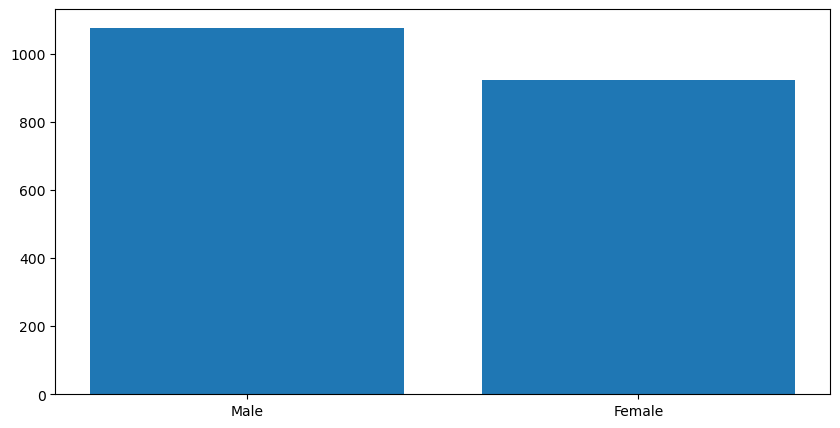

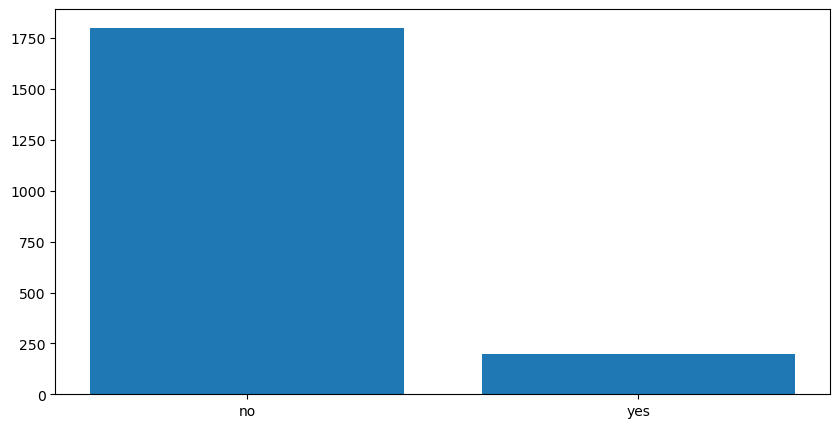

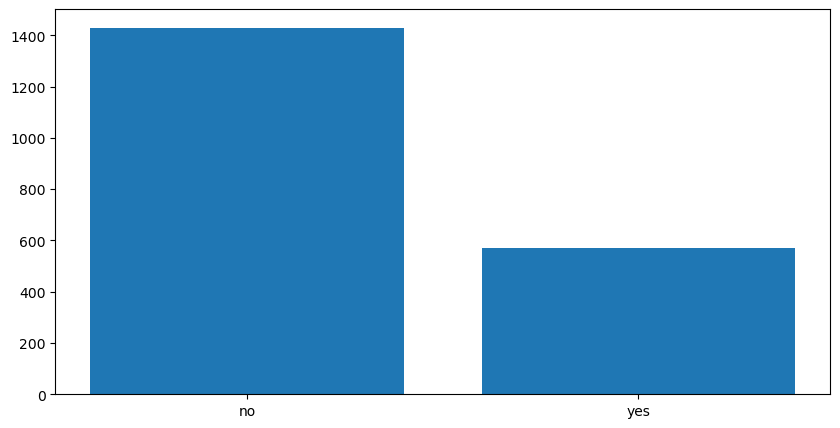

In [77]:
import matplotlib.pyplot as plt
new_folder='c_barchart'
path=os.getcwd()
new_dir=os.path.join(path,new_folder)

try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

for i in cat[1:]:
    churn_data[i].value_counts()
    keys=churn_data[i].value_counts().keys()
    values=churn_data[i].value_counts().values
    plt.figure(figsize=(10,5))
    plt.bar(keys,values)
    plt.savefig('c_barchart.jpg')
    plt.show()

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\malaya\\Documents\\EDA\\c_piechart'


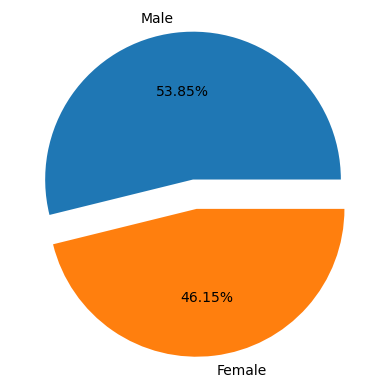

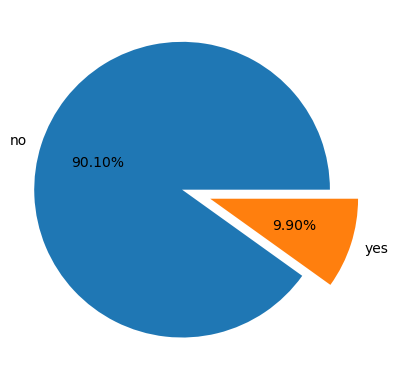

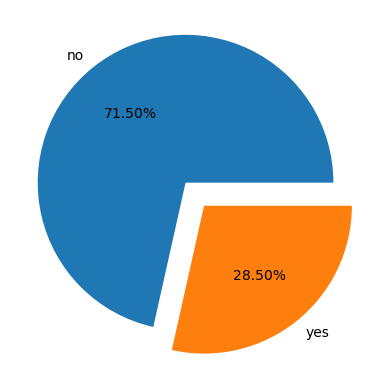

In [49]:
import matplotlib.pyplot as plt
new_folder='c_piechart'
path=os.getcwd()
new_dir=os.path.join(path,new_folder)

try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

for i in cat[1:]:
    churn_data[i].value_counts()
    keys=churn_data[i].value_counts().keys()
    values=churn_data[i].value_counts().values
    plt.pie(values,explode=[0.1,0.1],labels=keys,autopct='%0.2f%%',radius=1)
    plt.savefig('c_piechart.jpg')
    plt.show()
    

In [88]:
churn_data.describe()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,37
count,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,0.53850,38.69050,99.750000,0.099000,0.285000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000,37.07150
std,0.49864,10.20641,39.755386,0.298737,0.451527,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485,7.77088
min,0.00000,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,18.00000
25%,0.00000,32.00000,73.000000,0.000000,0.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000,32.00000
50%,1.00000,37.00000,99.000000,0.000000,0.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000,37.00000
75%,1.00000,44.00000,127.000000,0.000000,1.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000,42.00000
max,1.00000,82.00000,243.000000,1.000000,1.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000,57.00000


[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\malaya\\Documents\\EDA\\c_histgrap'


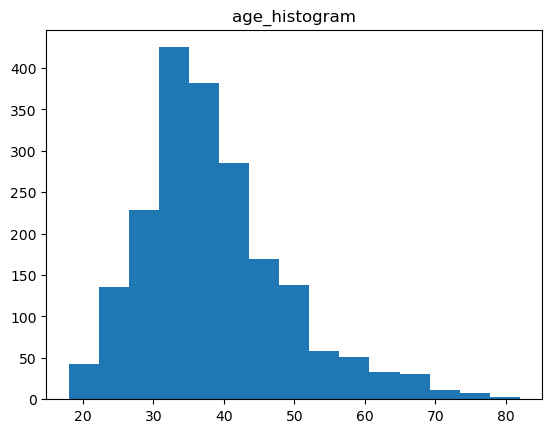

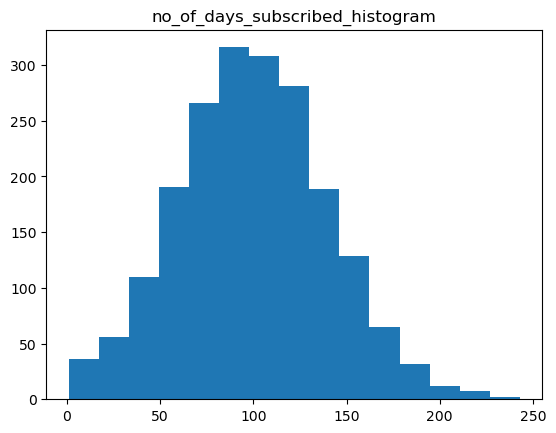

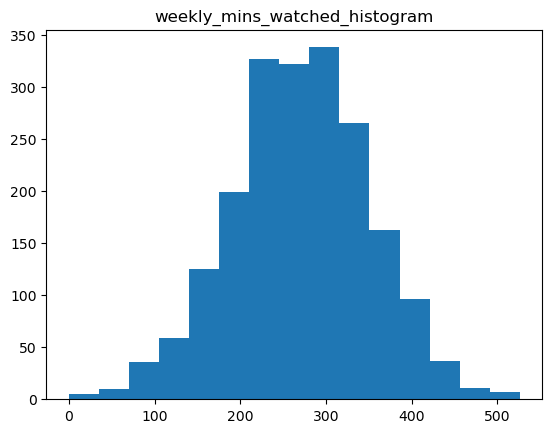

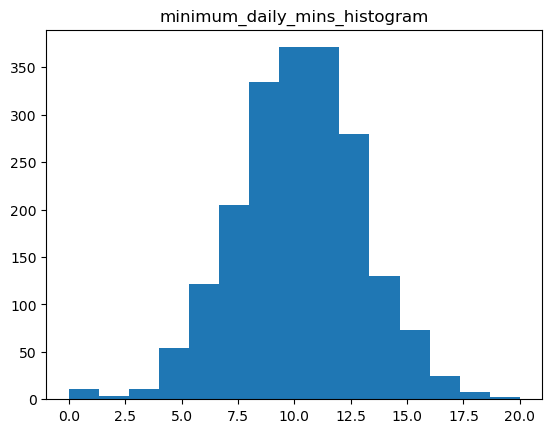

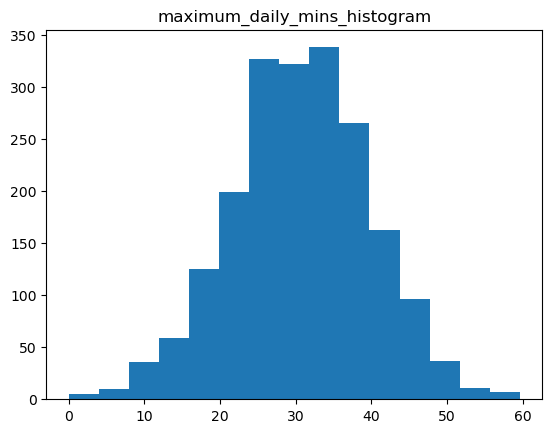

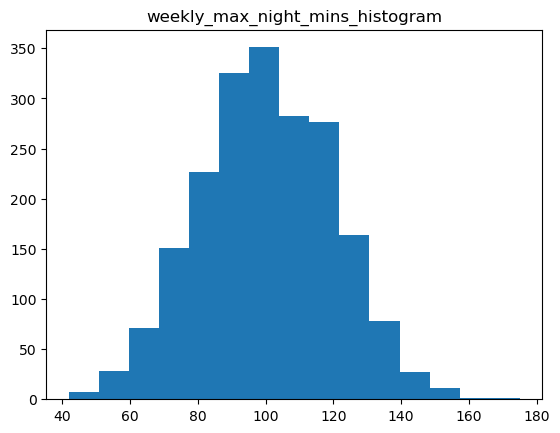

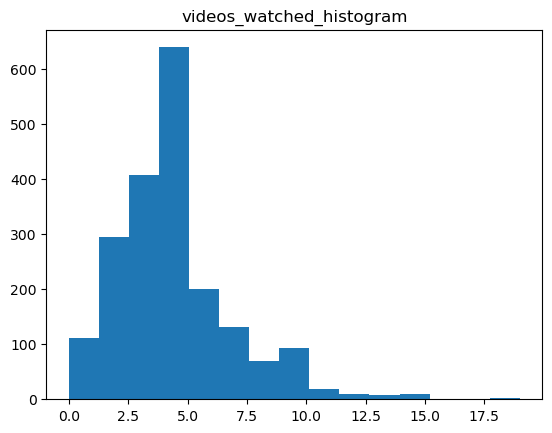

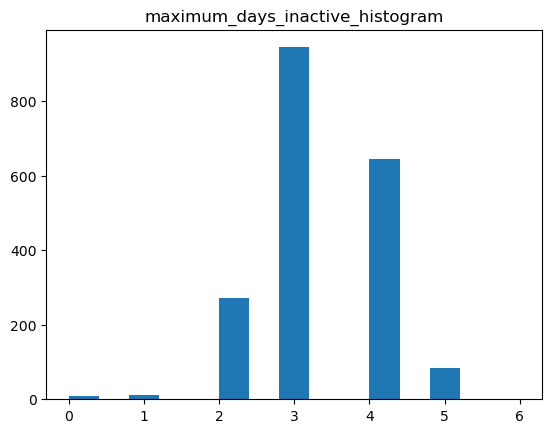

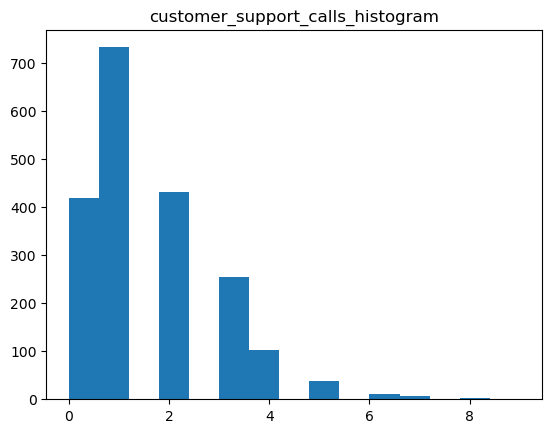

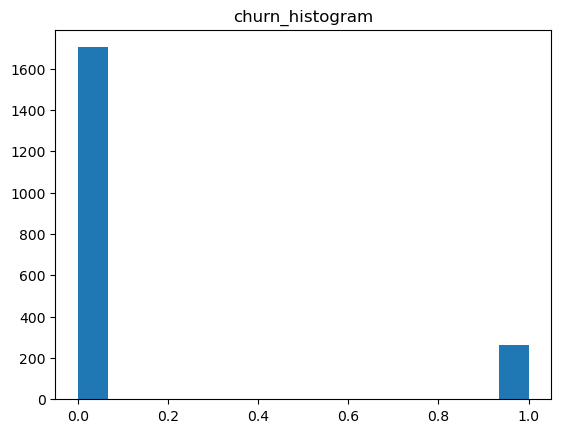

In [27]:
import matplotlib.pyplot as plt
import os
new_folder='c_histgrap'
path=os.getcwd()
new_dir=os.path.join(path,new_folder)

try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

for i in num[2:]:
    path=f'{i}_histogram.jpg'
    new_path=os.path.join(new_dir,path)
    plt.hist(churn_data[i],bins=15)
    plt.title(f'{i}_histogram')
    plt.savefig(new_path)
    plt.show()

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\malaya\\Documents\\EDA\\c_boxplot'


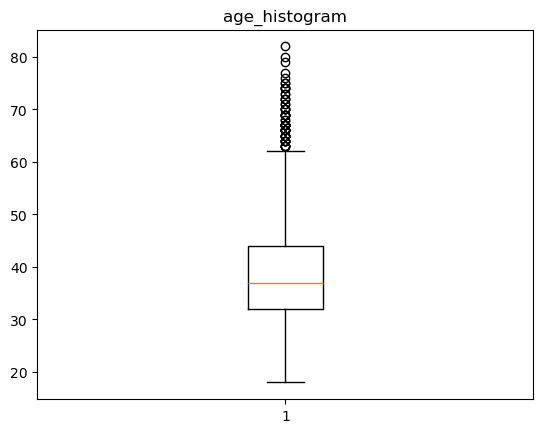

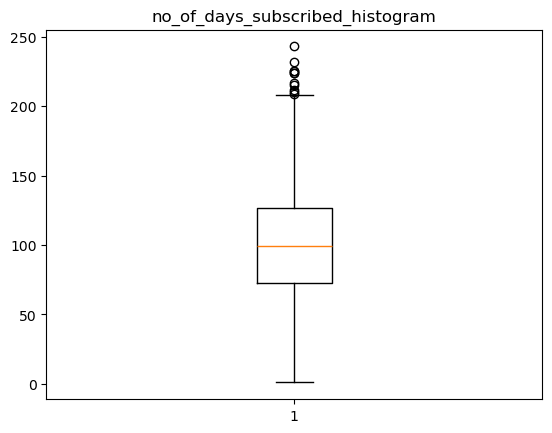

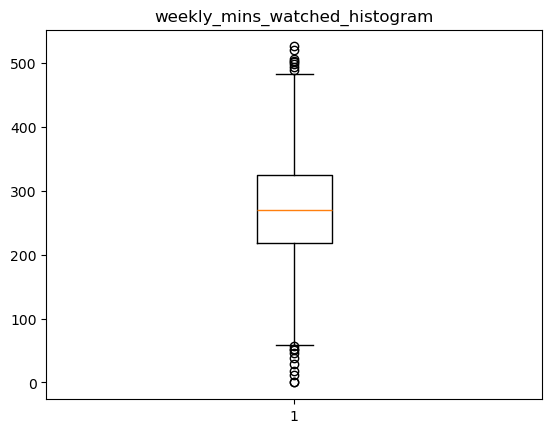

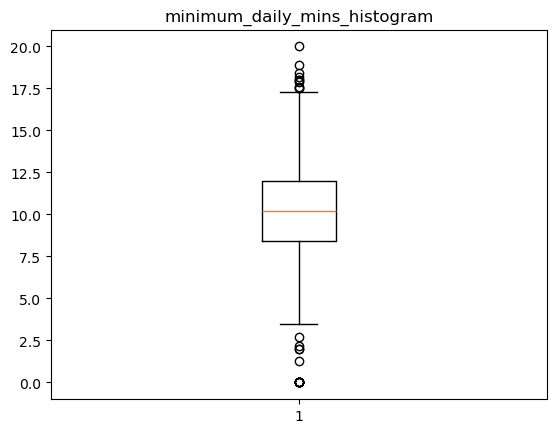

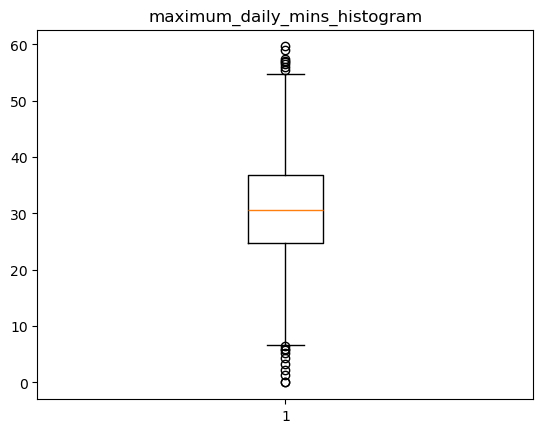

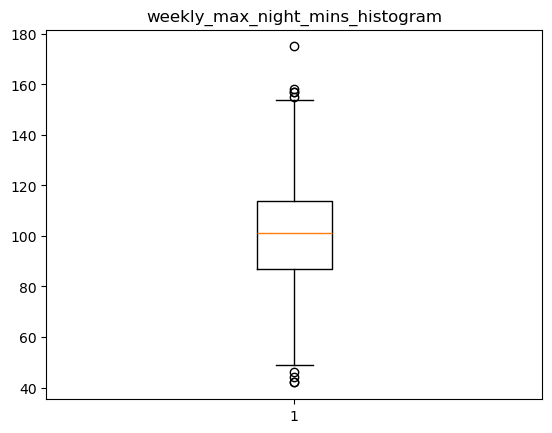

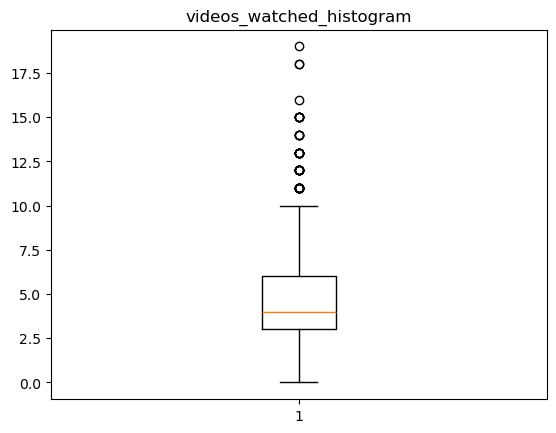

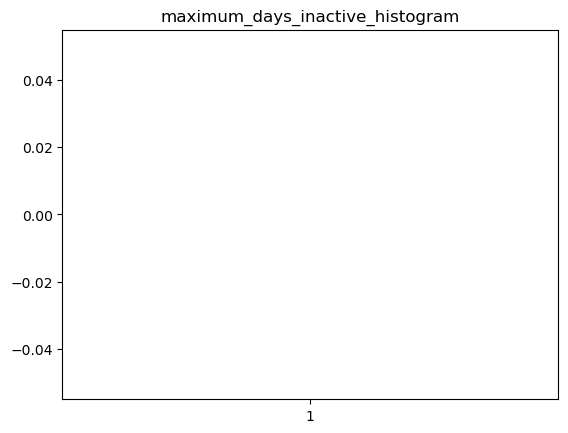

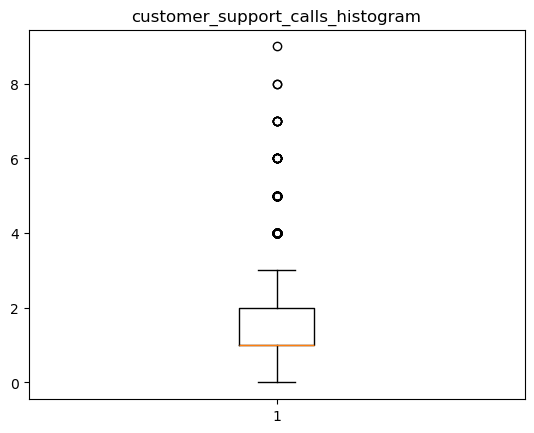

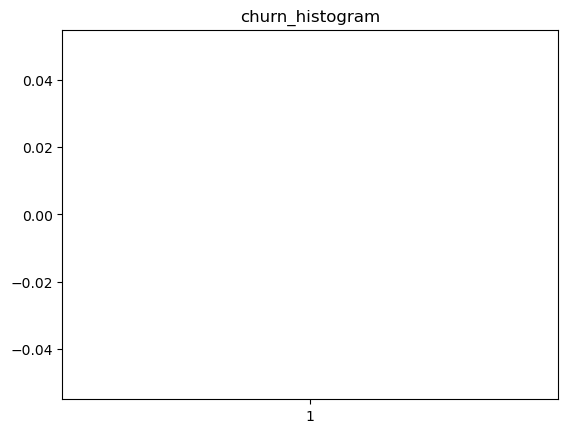

In [31]:
import os
new_folder='c_boxplot'
path=os.getcwd()
new_dir=os.path.join(path,new_folder)

try:
    os.makedirs(new_dir)

except Exception as e:
    print(e)

for i in num[2:]:
    path=f'{i}_histogram.jpg'
    new_path=os.path.join(new_dir,path)
    plt.boxplot(churn_data[i])
    plt.title(f'{i}_histogram')
    plt.savefig(new_path)
    plt.show()

In [41]:
import numpy as np
minimum_data=churn_data['maximum_daily_mins']
q1=round(np.quantile(minimum_data,0.25),2)
q3=round(np.quantile(minimum_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=churn_data['maximum_daily_mins']>lb
con2=churn_data['maximum_daily_mins']<ub
con3=con1&con2
count=len(churn_data[con3])
non_outliers_data=churn_data[con3]
non_outliers_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [133]:
for i in num:
        q1=np.quantile(churn_data[i],0.25)
        q3=np.quantile(churn_data[i],0.75)
        IQR=q3-q1
        lb=q1-1.5*IQR
        ub=q3+1.5*IQR
        con1=churn_data[i]>=lb
        con2=churn_data[i]<=ub
        con3=con1&con2
        count=len(churn_data[con3])
        non_outliers_data1=churn_data[con3]
non_outliers_data1
    

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
6,NaN,54,59,no,no,239.25,10.2,27.12,106,4,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,0.0
1995,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0


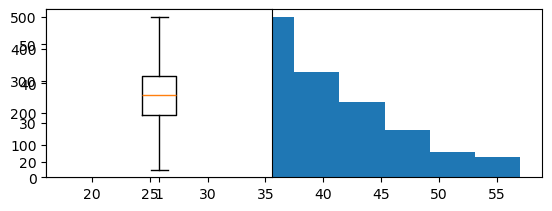

In [73]:

ccc=churn_data[i]
q1=np.quantile(churn_data[i],0.25)
q3=np.quantile(churn_data[i],0.75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
median=ccc.median()
new_data=[]
for i in ccc:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)

churn_data[i]=new_data
plt.subplot(2,1,1).hist(churn_data[i])
plt.subplot(2,2,1).boxplot(churn_data[i])
plt.show()


<Axes: >

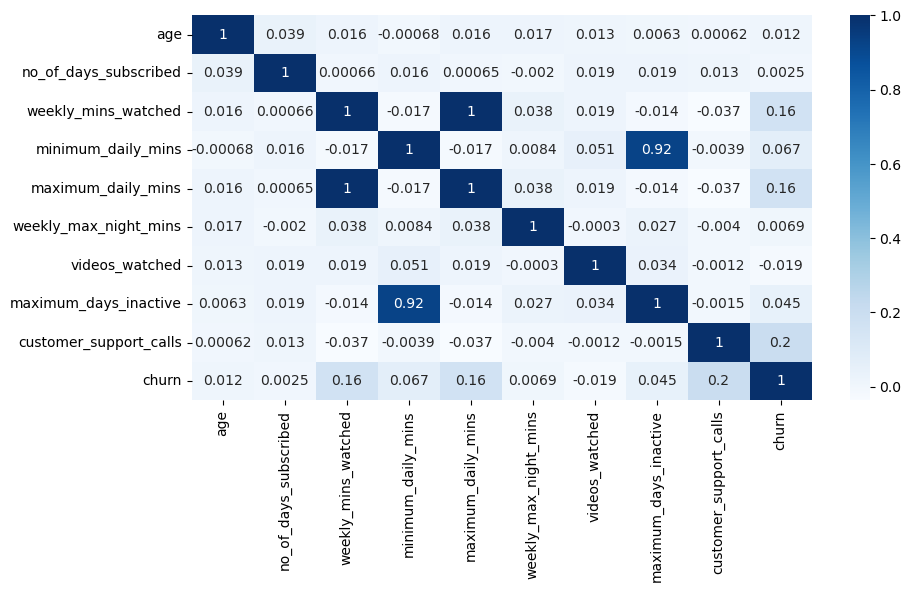

In [51]:
import seaborn as sns
corr=churn_data.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Blues')

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    churn_data[i]=le.fit_transform(churn_data[i])

churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,1,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,1,40,94,0,0,178.05,10.4,20.18,100,6,3.0,3,0.0


In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in cat:
    churn_data[i]=ss.fit_transform(churn_data[[i]])

churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,-1.056605,36,62,-0.331478,-0.631349,148.35,12.2,16.81,82,1,4.0,1,0.0
1,-1.056605,39,149,-0.331478,-0.631349,294.45,7.7,33.37,87,3,3.0,2,0.0
2,-1.056605,65,126,-0.331478,-0.631349,87.30,11.9,9.89,91,1,4.0,5,1.0
3,-1.056605,24,131,-0.331478,1.583910,321.30,9.5,36.41,102,4,3.0,3,0.0
4,-1.056605,40,191,-0.331478,-0.631349,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.056605,54,75,-0.331478,1.583910,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,0.862750,45,127,-0.331478,-0.631349,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2.782105,53,94,-0.331478,-0.631349,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,0.862750,40,94,-0.331478,-0.631349,178.05,10.4,20.18,100,6,3.0,3,0.0
